# 🌳 Green Cover Analysis – Bengaluru

This notebook explores tree density, parks, and green zones across different wards in Bengaluru using publicly available geo data.

In [ ]:
# Install necessary packages (if not already installed)
# !pip install geopandas folium pandas matplotlib

In [19]:
import geopandas as gpd

# Load Bengaluru BBMP ward boundaries (GeoJSON)
url = "https://raw.githubusercontent.com/datameet/Municipal_Spatial_Data/master/Bangalore/BBMP.geojson"
wards = gpd.read_file(url)
#wards.columns
wards = wards[['KGISWardName', 'geometry']]
# adjust columns as available
wards.head()


,KGISWardName,geometry
0,Kempegowda Ward,"POLYGON ((77.61545 13.13028, 77.61549 13.1304,..."
1,Chowdeswari Ward,"POLYGON ((77.57375 13.13736, 77.5737 13.13721,..."
2,Someshwara Ward,"POLYGON ((77.56257 13.1164, 77.56252 13.11643,..."
3,Atturu Layout,"POLYGON ((77.55155 13.10086, 77.55149 13.10086..."
4,Yelahanka Satellite Town,"POLYGON ((77.59084 13.07785, 77.59101 13.07826..."


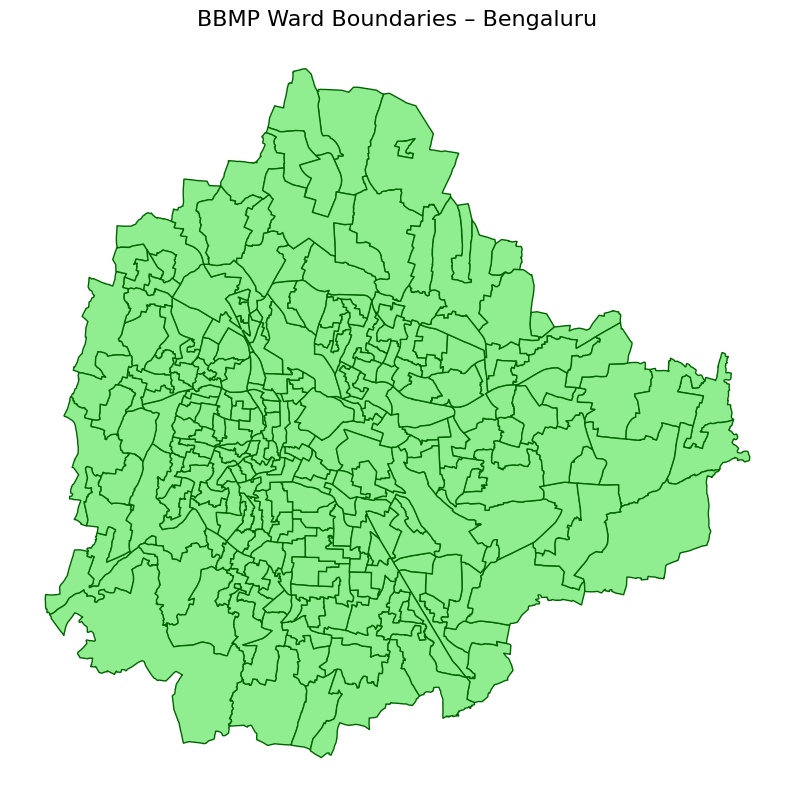

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
wards.plot(ax=ax, color="lightgreen", edgecolor="darkgreen")
plt.title("BBMP Ward Boundaries – Bengaluru", fontsize=16)
plt.axis('off')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


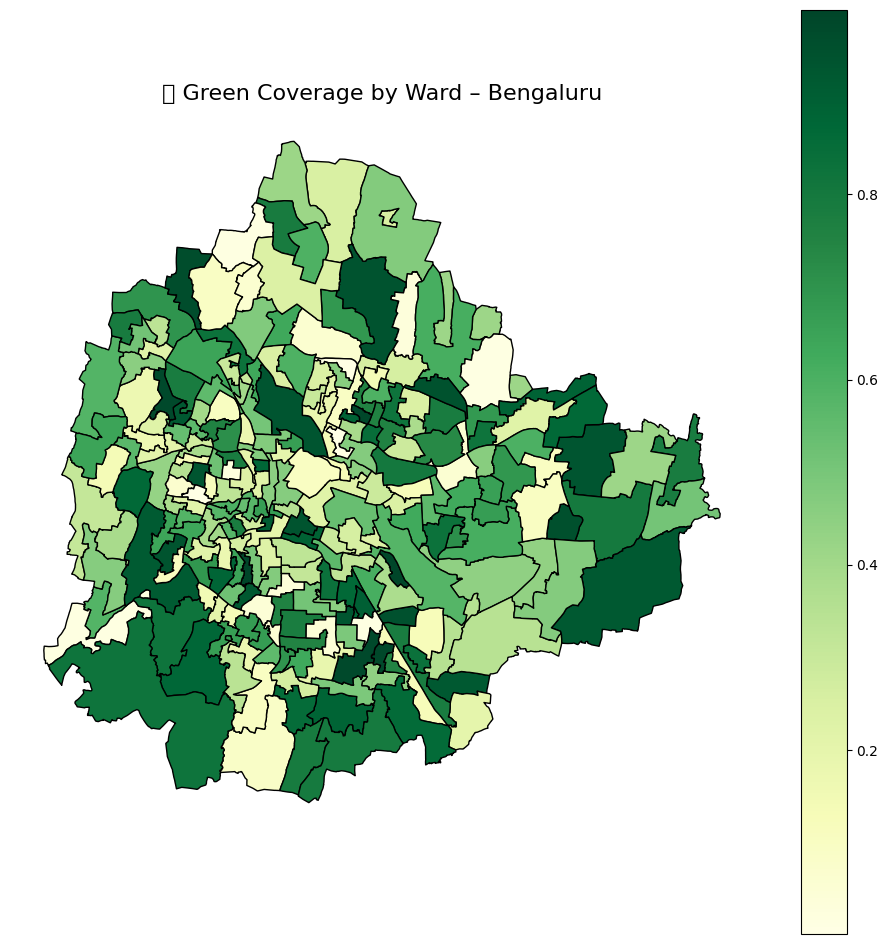

In [23]:
import numpy as np

wards['green_index']= np.random.rand(len(wards))

fig, ax = plt.subplots(figsize=(12, 12))
wards.plot(
    ax=ax,
    column='green_index',
    cmap='YlGn',
    legend=True,
    edgecolor='black'
)
plt.title("🌿 Green Coverage by Ward – Bengaluru", fontsize=16)
plt.axis('off')
plt.show()



In [33]:
import folium

# Initialize map
m = folium.Map(location=[12.9716, 77.5946], zoom_start=11)
import numpy as np

wards['green_index']= np.random.rand(len(wards))

# Add ward boundaries with choropleth
folium.Choropleth(
    geo_data=wards,
    data=wards,
    columns=["KGISWardName", "green_index"],  # replace with your actual ward name column
    key_on="feature.properties.KGISWardName",  # update this too
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Green Index"
).add_to(m)

# Show map
m


In [31]:
# Load Bengaluru BBMP ward boundaries (GeoJSON)
url = "https://raw.githubusercontent.com/datameet/Municipal_Spatial_Data/master/Bangalore/BBMP.geojson"
wards = gpd.read_file(url)
wards.columns

Index(['KGISWardID', 'KGISWardCode', 'LGD_WardCode', 'KGISWardNo',
       'KGISWardName', 'KGISTownCode', 'geometry'],
      dtype='object')